In [88]:
import numpy as np
import pandas as pd
import os,sys,inspect
import scipy.stats as stats
import scipy.optimize as opt
import econtools 
import econtools.metrics as mt
import statsmodels.discrete.discrete_model as sm
import matplotlib.pyplot as plt
import itertools as it
import copy


from entry import entry_estimation 

import importlib
importlib.reload(entry_estimation)

<module 'entry.entry_estimation' from '/Users/jingyuanwang/GitHub/NU450_HW/450-1-Final/entry/entry_estimation.py'>

In [89]:
# ------------------------------------------------------------------------
# NOTE
# ------------------------------------------------------------------------
# Purpose: Final Q3 
# 
# 
#
# ------------------------------------------------------------------------

# working directory

In [90]:
rootpath = '/Users/jingyuanwang/Dropbox/Course/ECON/IO/NU450/NU450_HW/450-1-Final'
datapath = rootpath + '/' + 'data'
resultpath = rootpath + '/' + 'results'

# Parameters

In [ ]:
theta = [1,3,1.5,0.3,0.1]

In [84]:
# save as a class
entry_model = entry_estimation.Entry_Model()

# (a)

In [85]:
n = 100
X_m = np.linspace(0,2.5,n)
N_m = np.ones(n)*5

In [86]:
prob = entry_model.Solve_prob_of_entry_SymmetricREE(theta, X_m, N_m)

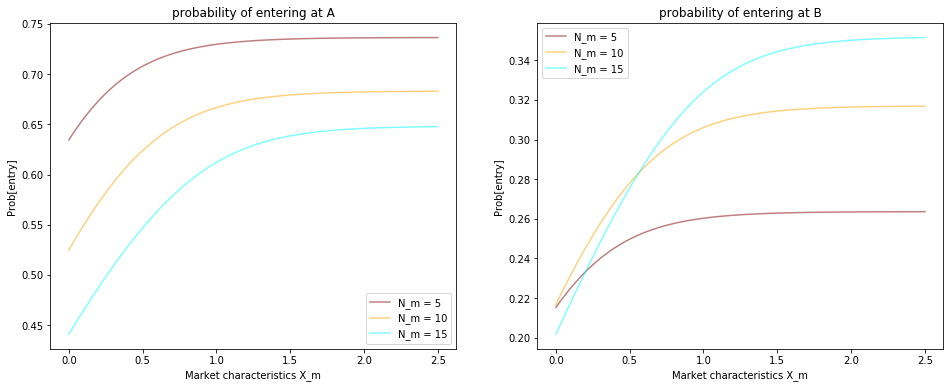

In [87]:
entry_model.Plot_prob_of_entry(theta, X_m, figpath = resultpath, figname = 'prob_entry', save = True)

# (b)